# Çoklu Sınıflandırma Örneği:

Reuters haberlerini 46 farklı sınıftan birine sınıflandıran ağı inşa edeceksiniz. Birden fazla sınıf olduğu için çoklu sınıflandırma örneğidir ve her veri bu kategorilerden sadece birine sınıflandırılabilir.

In [ ]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


8982 eğitim ve 2246 test örneğimiz bulunmaktadır.

In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

IMDB veri setinde olduğu gibi her örnek tam sayılardan oluşan bir listedir.(kelime indeksleri)

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

# Verileri Hazırlamak:

Etiketleri vektöre dönüştürmek.

In [ ]:
import numpy as np

def vectorize_sequence(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence]=1.
  return results

#Eğitim verisinin vektöre dönüştürülmesi
x_train=vectorize_sequence(train_data)

#Test verisinin vektöre dönüştürülmesi
x_test=vectorize_sequence(test_data)

In [ ]:
#Eğitim etiketlerinin vektöre dönüştürlmesi:
from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

# Ağ İnşa Etmek:

Model Tanımı

In [ ]:
from keras import models
from keras import layers

model=models.Sequential()

model.add(layers.Dense(64,activation="relu",input_shape=(10000,)))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(46,activation="softmax"))

Modeli Derlemek:

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

Doğrulama Veri Seti Oluşturmak:

In [ ]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

Model Eğitmek:

In [ ]:
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 57ms/step - loss: 2.6940 - accuracy: 0.5497 - val_loss: 1.7661 - val_accuracy: 0.6430
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 1.4342 - accuracy: 0.7162 - val_loss: 1.3017 - val_accuracy: 0.7190
Epoch 3/20
16/16 [==============================] - 1s 44ms/step - loss: 1.0388 - accuracy: 0.7843 - val_loss: 1.1057 - val_accuracy: 0.7690
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 0.8085 - accuracy: 0.8295 - val_loss: 1.0304 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6402 - accuracy: 0.8641 - val_loss: 0.9474 - val_accuracy: 0.8040
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.5113 - accuracy: 0.8988 - val_loss: 0.8991 - val_accuracy: 0.8150
Epoch 7/20
16/16 [==============================] - 1s 42ms/step - loss: 0.4098 - accuracy: 0.9171 - val_loss: 0.9056 - val_accuracy: 0.8120
Epoch 8/20
16

Eğitim ve Doğrulama Kayıplarını Çizdirmek:

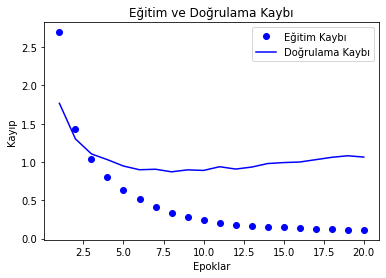

In [ ]:
import matplotlib.pyplot as plt

loss=history.history["loss"]
val_loss=history.history["val_loss"]

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,"bo",label="Eğitim Kaybı")
plt.plot(epochs,val_loss,"b",label="Doğrulama Kaybı")
plt.title("Eğitim ve Doğrulama Kaybı")
plt.xlabel("Epoklar")
plt.ylabel("Kayıp")
plt.legend()

plt.show

Eğitim ve Doğrulama Başarımını Çizdirmek

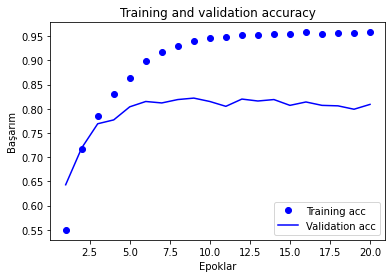

In [ ]:
plt.clf()

accuracy=history.history["accuracy"]
val_accuracy=history.history["val_accuracy"]

plt.plot(epochs,accuracy,"bo",label="Training acc")
plt.plot(epochs,val_accuracy,"b",label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epoklar")
plt.ylabel("Başarım")
plt.legend()
plt.show()